# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [234]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 
import csv
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?"
    
query_url = f"{url}appid={weather_api_key}&units={units}&q="
units = ["metric", "imperial"]

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()


In [36]:
city_df = []
country_df = []
date_df = []
lat_vol = []
lon_vol = []
temperature = []
humidity = []
cloudiness = []
wind_speed_df = []

In [38]:

processing_data = 1

# Loop Through List of Cities & Perform a Request for Data on Each city
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        
        city_df.append(response["name"])
        
        country_df.append(response["sys"]["country"])
        date_df.append(response["dt"])
        lat_vol.append(response["coord"]["lat"])
        lon_vol.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed_df.append(response["wind"]["speed"])
        
        city_data = response["name"]
        
        print(f"searching for Record {processing_data} {city_data}")
        
         # Increase data Counter by 1 For Each Loop
        processing_data += 1
        
    except(KeyError):
        print("message: city not found") 
    continue


message: city not found
searching for Record 1 Leningradskiy
searching for Record 2 Castro
searching for Record 3 Albany
searching for Record 4 Laguna
searching for Record 5 Kudahuvadhoo
searching for Record 6 Bengkulu
searching for Record 7 Kaitangata
searching for Record 8 Lukulu
searching for Record 9 Shizunai-furukawachō
searching for Record 10 Jamestown
searching for Record 11 Arraial do Cabo
searching for Record 12 Ponta do Sol
searching for Record 13 Kanniyākumāri
searching for Record 14 Vila Velha
searching for Record 15 Saskylakh
searching for Record 16 Santiago del Estero
searching for Record 17 Mataura
searching for Record 18 Rikitea
searching for Record 19 Busselton
searching for Record 20 Vila Franca do Campo
searching for Record 21 Santa Cruz de la Sierra
searching for Record 22 Esperance
searching for Record 23 Oistins
searching for Record 24 Tual
searching for Record 25 Tūkrah
searching for Record 26 Ayat
searching for Record 27 Punta Arenas
searching for Record 28 Ilul

searching for Record 226 Matamoros
searching for Record 227 Clarence Town
searching for Record 228 Kitimat
searching for Record 229 Praia
searching for Record 230 Agirish
searching for Record 231 Calamar
searching for Record 232 Marmande
searching for Record 233 Moose Factory
searching for Record 234 Māngrol
searching for Record 235 Dubai
searching for Record 236 Bereda
searching for Record 237 Comodoro Rivadavia
searching for Record 238 Faanui
searching for Record 239 Green Valley
searching for Record 240 The Valley
searching for Record 241 Mormugao
searching for Record 242 Okato
searching for Record 243 Biu
searching for Record 244 Cotonou
searching for Record 245 Shirochanskoye
searching for Record 246 Avera
searching for Record 247 Fare
searching for Record 248 Puro
searching for Record 249 Teya
searching for Record 250 Padang
searching for Record 251 West Odessa
searching for Record 252 Bethel
searching for Record 253 Thompson
message: city not found
searching for Record 254 Luziâ

searching for Record 452 Salinópolis
searching for Record 453 Msowero
searching for Record 454 Muisne
searching for Record 455 Caravelas
searching for Record 456 Bima
searching for Record 457 Hofn
searching for Record 458 Korbach
searching for Record 459 São Borja
searching for Record 460 Tigil'
searching for Record 461 Chernyshevskiy
searching for Record 462 Sai Buri
searching for Record 463 Am Timan
searching for Record 464 San Clemente
message: city not found
searching for Record 465 Tshikapa
searching for Record 466 Ahipara
searching for Record 467 Jinxi
searching for Record 468 Akhisar
searching for Record 469 Ca Mau
searching for Record 470 Turaif
searching for Record 471 Carutapera
searching for Record 472 Rengo
searching for Record 473 Elizabeth City
searching for Record 474 Okhotsk
searching for Record 475 Feijó
searching for Record 476 Saint Paul Harbor
searching for Record 477 Solenzo
searching for Record 478 Barreirinhas
searching for Record 479 Ilorin
searching for Record 

In [28]:
# weather_json

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [235]:
weather_dict = {
    "City": city_df,
    "Country": country_df,
    "Date": date_df,
    "Latitude": lat_vol,
    "Longitude": lon_vol,
    "Max Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed_df
}

weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City               562
Country            562
Date               562
Latitude           562
Longitude          562
Max Temperature    562
Humidity           562
Cloudiness         562
Wind Speed         562
dtype: int64

In [62]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Leningradskiy,RU,1597543234,69.38,178.42,283.04,68,15,5.94
1,Castro,BR,1597543055,-24.79,-50.01,287.72,95,100,3.94
2,Albany,US,1597543049,42.60,-73.97,295.37,66,61,2.39
3,Laguna,US,1597543234,38.42,-121.42,315.37,9,1,4.10
4,Kudahuvadhoo,MV,1597543234,2.67,72.89,301.50,67,48,1.47


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
#  Get the indices of cities that have humidity over 100%.

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

weather_df_val = weather_df.dropna()

weather_df_val = weather_df_val.reset_index(drop=True)

weather_df_val["City"] = weather_df_val["City"]



In [10]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

#weather_df.to_csv("./ouput_data/weather_df.csv")
weather_df.to_csv = ("./output_data/weather_df.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

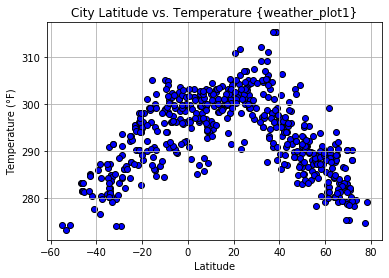

In [239]:


weather_plot1 = weather_df_val["Date"][0]

plt.scatter(weather_df_val["Latitude"], weather_df_val["Max Temperature"], facecolor="blue", marker="o",edgecolors='black')

# set graph properties
plt.title("City Latitude vs. Temperature {weather_plot1}")
plt.ylabel("Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("Temp_Latitude.png")
plt.show()


## Latitude vs. Humidity Plot

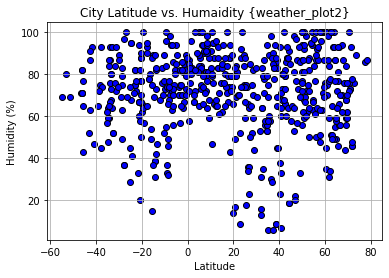

In [238]:
weather_plot2 = weather_df_val["Date"][0]

plt.scatter(weather_df_val["Latitude"], weather_df_val["Humidity"], facecolor="blue", marker="o",edgecolors='black')

# set graph properties
plt.title("City Latitude vs. Humaidity {weather_plot2}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("Humidity_Latitude.png")
plt.show()


## Latitude vs. Cloudiness Plot

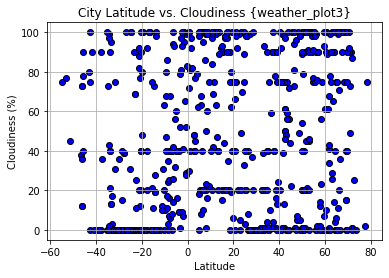

In [237]:
weather_plot3 = weather_df_val["Date"][0]

plt.scatter(weather_df_val["Latitude"], weather_df_val["Cloudiness"], facecolor="blue", marker="o",edgecolors='black')

# set graph properties
plt.title("City Latitude vs. Cloudiness {weather_plot3}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("Cloudiness_Latitude.png")
plt.show()


## Latitude vs. Wind Speed Plot

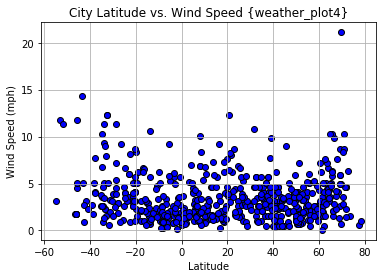

In [243]:
weather_plot4 = weather_df_val["Date"][0]

plt.scatter(weather_df_val["Latitude"], weather_df_val["Wind Speed"], facecolor="blue", marker="o",edgecolors='black')

# set graph properties
plt.title("City Latitude vs. Wind Speed {weather_plot4}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("Wind_Speed_Latitude.png")
plt.show()

## Linear Regression

In [158]:
# OPTIONAL: Create a function to create Linear Regression plots


In [199]:

def plot_lin_reg(x_value,y_value,xlbl,ylbl,lblpos,ifigure):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_values,"r-")
    
    plt.annotate(line_eq,lblpos,fontsize=14,color="blue")
    print(f"The r-squared is: {rvalue}")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    
    plt.savefig(f"fig{ifigure}.png")
    plt.show() 

In [200]:
# Create Northern and Southern Hemisphere DataFrames

hem_northern_df = weather_df_val.Latitude >= 0
hem_southtern_df = weather_df_val.Latitude < 0

weather_northern = weather_df_val[hem_northern_df]
weather_southern = weather_df_val[hem_southtern_df]

weather_northern = weather_northern.reset_index(drop=True)
weather_southern = weather_southern.reset_index(drop=True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6930652914609572


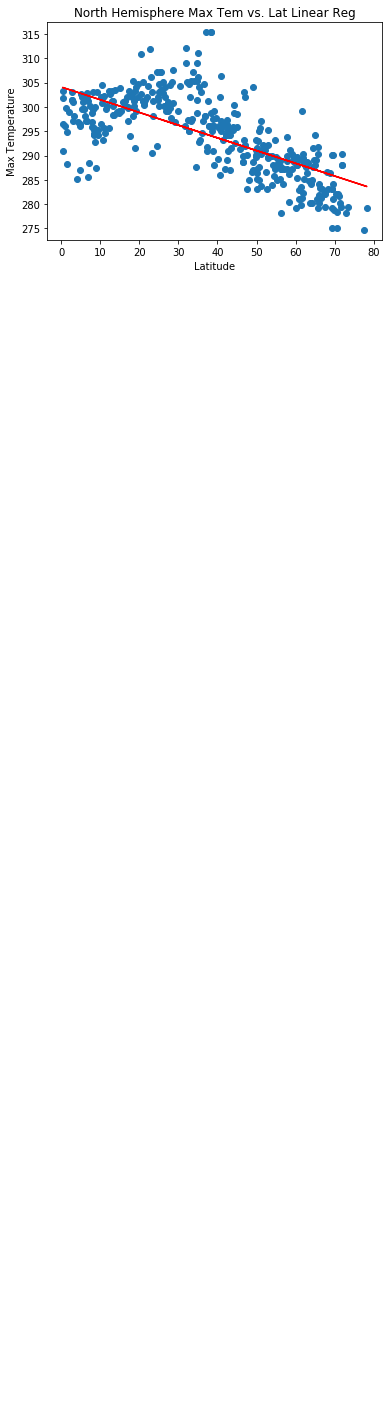

In [201]:

xlbl = "Latitude"
ylbl = "Max Temperature"
lblpos = (0,30)
plt.title("North Hemisphere Max Tem vs. Lat Linear Reg")
plot_lin_reg(weather_northern[xlbl],weather_northern[ylbl],xlbl,ylbl,lblpos,1)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7841912955389293


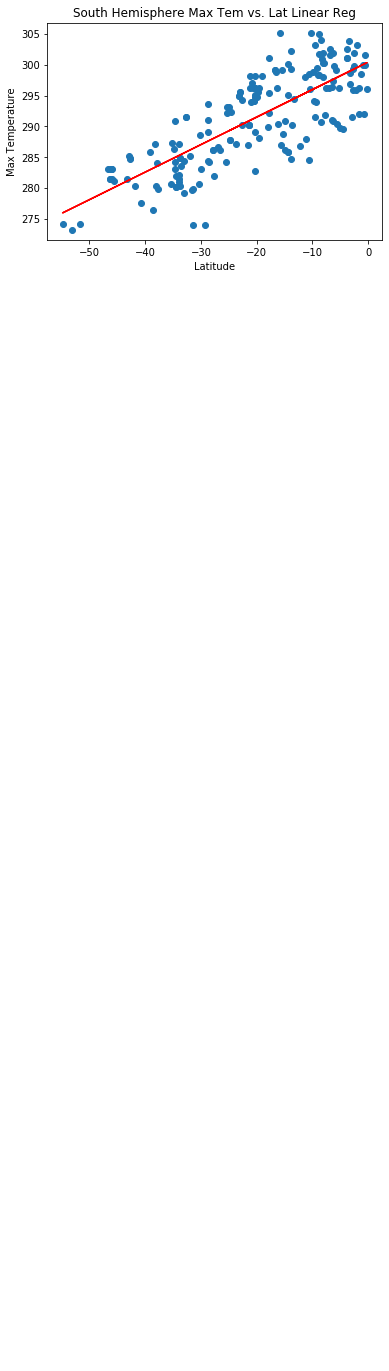

In [229]:
xlbl = "Latitude"
ylbl = "Max Temperature"
lblpos = (-45,90)
plt.title("South Hemisphere Max Tem vs. Lat Linear Reg")
plot_lin_reg(weather_southern[xlbl],weather_southern[ylbl],xlbl,ylbl,lblpos,2)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.08326482667605868


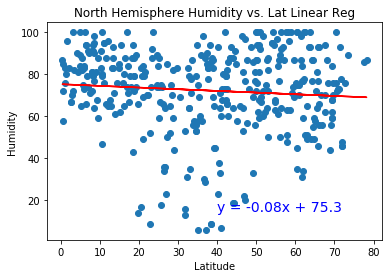

In [210]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (40,15)
plt.title("North Hemisphere Humidity vs. Lat Linear Reg")
plot_lin_reg(weather_northern[xlbl],weather_northern[ylbl],xlbl,ylbl,lblpos,3)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03737514188228299


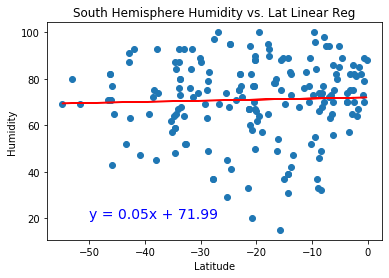

In [230]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (-50,20)
plt.title("South Hemisphere Humidity vs. Lat Linear Reg")
plot_lin_reg(weather_southern[xlbl],weather_southern[ylbl],xlbl,ylbl,lblpos,4)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.07543964102848279


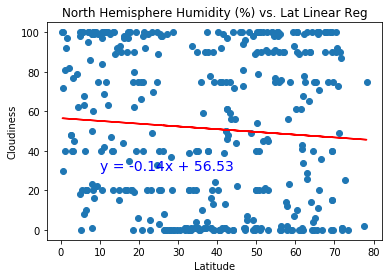

In [219]:
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (10,30)
plt.title("North Hemisphere Humidity (%) vs. Lat Linear Reg")
plot_lin_reg(weather_northern[xlbl],weather_northern[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.028841109142025725


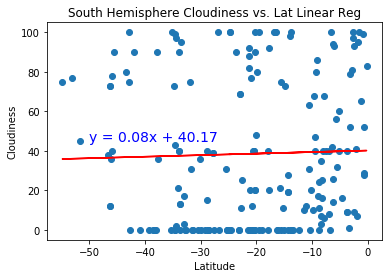

In [231]:
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (-50,45)
plt.title("South Hemisphere Cloudiness vs. Lat Linear Reg")
plot_lin_reg(weather_southern[xlbl],weather_southern[ylbl],xlbl,ylbl,lblpos,6)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1369703072219265


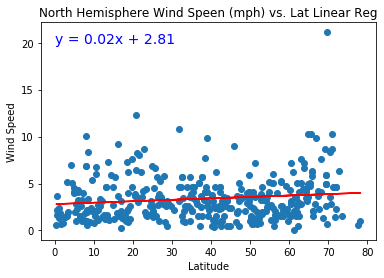

In [241]:
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (0,20)
plt.title("North Hemisphere Wind Speen (mph) vs. Lat Linear Reg")
plot_lin_reg(weather_northern[xlbl],weather_northern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3219121185896618


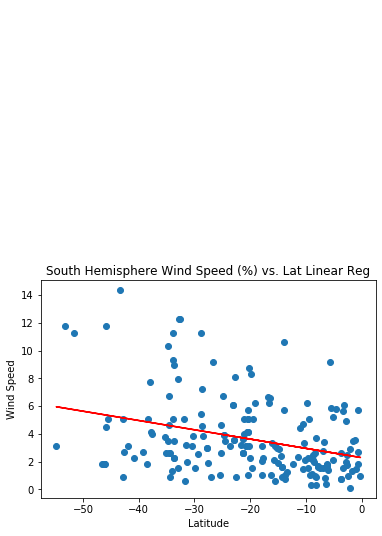

In [245]:
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (-20,34)
plt.title("South Hemisphere Wind Speed (%) vs. Lat Linear Reg")
plot_lin_reg(weather_southern[xlbl],weather_southern[ylbl],xlbl,ylbl,lblpos,8)